# Dataset Analysis: Player Career Statistics

This notebook explores and analyzes the **Total Career Stats** dataset, containing gaming statistics for players including total kills, wins, and revives. The dataset provides valuable insights into player performance.


##  2. Data Import and Initial Inspection

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('Total_Career_Stats.csv')

# Initial inspection
print(data.head())
print(data.info())
print(data.describe())


  player_name  career_kills  career_wins  career_revives
0      xoKaiz      351847.0      12109.0         16901.0
1     Upthrow      287983.0      19846.0         61712.0
2      Tollis      269662.0      16175.0         27939.0
3  Forget Dat      263062.0      15627.0         27177.0
4    iMarshTV      235493.0      16196.0         19687.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2901 entries, 0 to 2900
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player_name     2900 non-null   object 
 1   career_kills    2901 non-null   float64
 2   career_wins     2901 non-null   float64
 3   career_revives  2901 non-null   float64
dtypes: float64(3), object(1)
memory usage: 90.8+ KB
None
        career_kills   career_wins  career_revives
count    2901.000000   2901.000000     2901.000000
mean   102952.881075   6581.510169    13613.296105
std     32804.661124   2319.328748     4550.347994
min       799.000000

## 3. Data Cleaning and Preparation

In [1]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Handle missing values (dropping rows with missing player names)
data_clean = data.dropna(subset=['player_name'])

# Confirm no missing values
print("\nAfter cleaning:\n", data_clean.isnull().sum())

# Check and display duplicates
duplicates = data_clean[data_clean.duplicated(keep=False)]

print(f"\nNumber of duplicate rows found: {duplicates.shape[0]}")

# Display duplicate rows clearly
if duplicates.shape[0] > 0:
    print("\nDuplicate rows:")
    display(duplicates.sort_values(by='player_name'))
else:
    print("\nNo duplicate rows found.")



NameError: name 'data' is not defined

### Code to Remove Duplicate Player Names:

In [ ]:
# Check initial number of rows
print("Initial number of rows:", data_clean.shape[0])

# Remove duplicates based on player_name (keep first occurrence)
data_clean = data_clean.drop_duplicates(subset=['player_name'], keep='first')

# Confirm duplicates are removed
print("Number of rows after removing duplicates:", data_clean.shape[0])

# Verify no duplicates remain
duplicates_remaining = data_clean['player_name'].duplicated().sum()
print("Duplicates remaining:", duplicates_remaining)


Initial number of rows: 2900
Number of rows after removing duplicates: 2482
Duplicates remaining: 0


## 4. Exploratory Data Analysis

### Descriptive Statistics

In [ ]:
# Summary statistics
print(data_clean.describe())


        career_kills   career_wins  career_revives
count    2482.000000   2482.000000     2482.000000
mean   100467.518131   6424.293312    13402.270749
std     30319.962019   2196.237171     4428.182777
min       799.000000    810.000000     3753.000000
25%     82857.000000   5100.500000    10911.250000
50%     93129.500000   6010.000000    12502.500000
75%    110000.750000   7269.750000    14584.500000
max    384461.000000  23953.000000    67615.000000


###  Distribution Visualizations

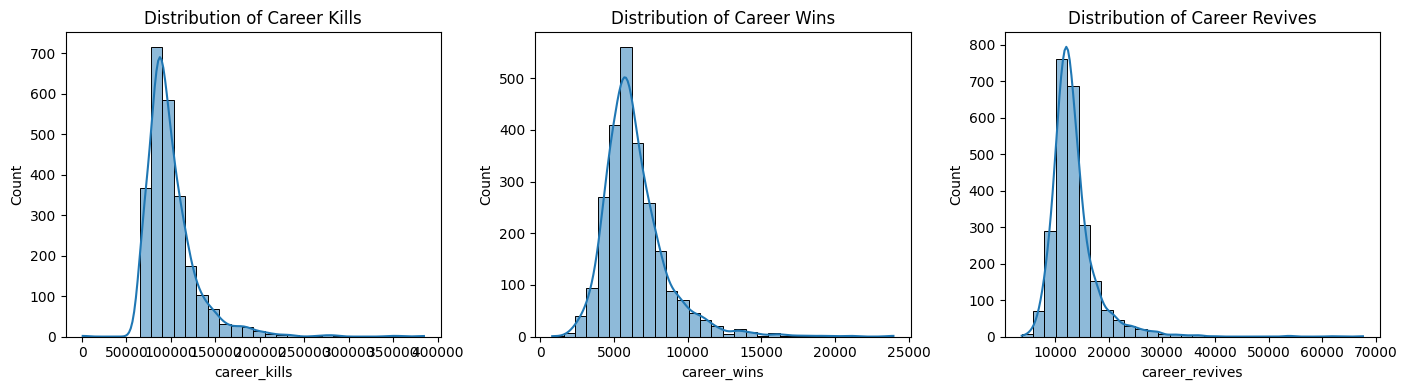

In [ ]:
# Histograms
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
sns.histplot(data_clean['career_kills'], bins=30, kde=True)
plt.title('Distribution of Career Kills')

plt.subplot(1, 3, 2)
sns.histplot(data_clean['career_wins'], bins=30, kde=True)
plt.title('Distribution of Career Wins')

plt.subplot(1, 3, 3)
sns.histplot(data_clean['career_revives'], bins=30, kde=True)
plt.title('Distribution of Career Revives')

plt.tight_layout()
plt.show()


### Boxplots for Outliers

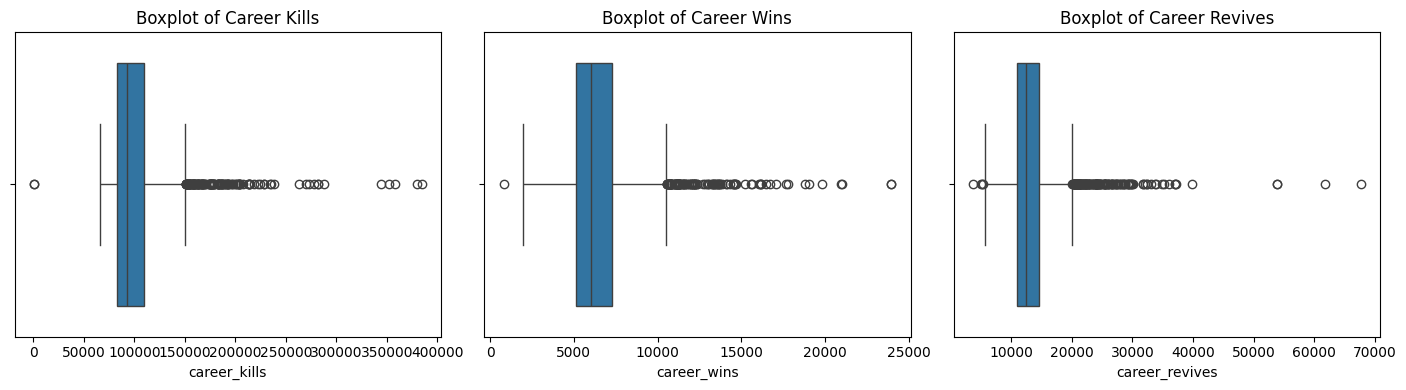

In [ ]:
# Boxplots
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x=data_clean['career_kills'])
plt.title('Boxplot of Career Kills')

plt.subplot(1, 3, 2)
sns.boxplot(x=data_clean['career_wins'])
plt.title('Boxplot of Career Wins')

plt.subplot(1, 3, 3)
sns.boxplot(x=data_clean['career_revives'])
plt.title('Boxplot of Career Revives')

plt.tight_layout()
plt.show()


### Correlation Analysis

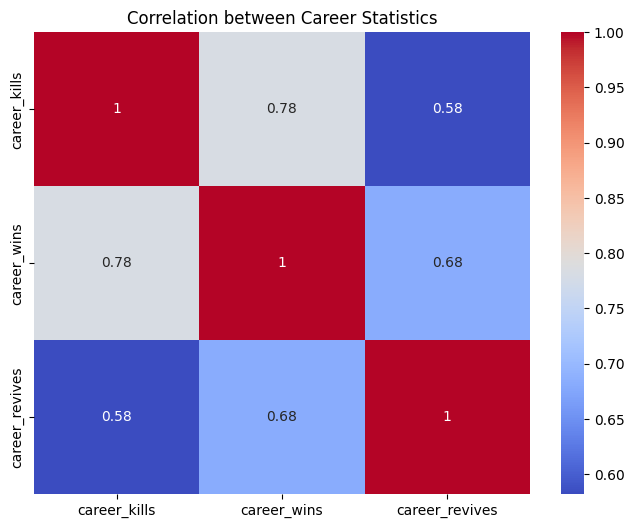

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data_clean[['career_kills', 'career_wins', 'career_revives']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Career Statistics')
plt.show()


##  5. Analysis and Insights

###  Top Players Analysis (Leaderboard)

In [ ]:
# Function to display top players anonymously
def show_top_players(df, column, top_n=10):
    top_players = df.sort_values(by=column, ascending=False).head(top_n).copy()
    top_players.reset_index(drop=True, inplace=True)
    top_players.index += 1  # Start ranking from 1
    top_players['Player_ID'] = ['Player_' + str(i) for i in top_players.index]
    return top_players[['Player_ID', column]]

# Display top players anonymously
print("🏆 Top 10 Players by Kills:\n", show_top_players(data_clean, 'career_kills'))

print("\n🏆 Top 10 Players by Wins:\n", show_top_players(data_clean, 'career_wins'))

print("\n🏆 Top 10 Players by Revives:\n", show_top_players(data_clean, 'career_revives'))



🏆 Top 10 Players by Kills:
     Player_ID  career_kills
1    Player_1      384461.0
2    Player_2      379649.0
3    Player_3      357870.0
4    Player_4      351847.0
5    Player_5      344453.0
6    Player_6      287983.0
7    Player_7      282247.0
8    Player_8      281412.0
9    Player_9      277390.0
10  Player_10      273258.0

🏆 Top 10 Players by Wins:
     Player_ID  career_wins
1    Player_1      23953.0
2    Player_2      23949.0
3    Player_3      21010.0
4    Player_4      20984.0
5    Player_5      19846.0
6    Player_6      19038.0
7    Player_7      18794.0
8    Player_8      17787.0
9    Player_9      17680.0
10  Player_10      17064.0

🏆 Top 10 Players by Revives:
     Player_ID  career_revives
1    Player_1         67615.0
2    Player_2         61712.0
3    Player_3         53805.0
4    Player_4         53768.0
5    Player_5         39756.0
6    Player_6         37108.0
7    Player_7         37070.0
8    Player_8         37024.0
9    Player_9         36069.0
10  Play

### Scatter Plots for Relationships

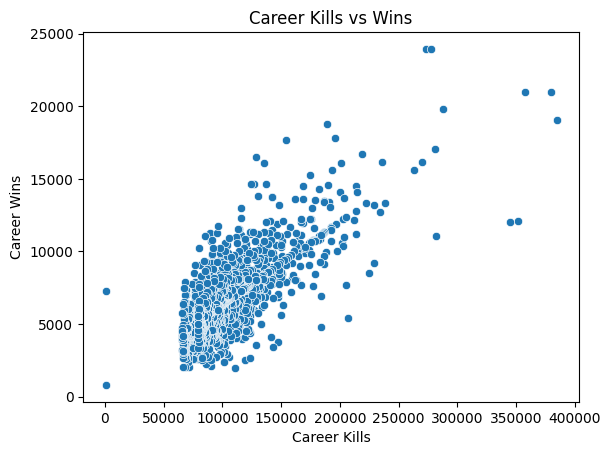

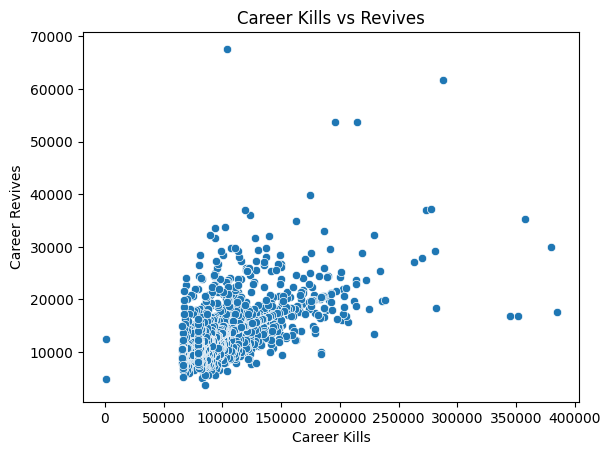

In [ ]:
# Scatter plot: Kills vs Wins
sns.scatterplot(x='career_kills', y='career_wins', data=data_clean)
plt.title('Career Kills vs Wins')
plt.xlabel('Career Kills')
plt.ylabel('Career Wins')
plt.show()

# Scatter plot: Kills vs Revives
sns.scatterplot(x='career_kills', y='career_revives', data=data_clean)
plt.title('Career Kills vs Revives')
plt.xlabel('Career Kills')
plt.ylabel('Career Revives')
plt.show()
